# Gathering Data

In [17]:
# Importing libraries
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [18]:
# Load tweet archive enhanced data using pandas (read_csv)
df_tweet_archive = pd.read_csv('twitter-archive-enhanced.csv')

### Using Request

In [19]:
import requests
import os


url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

response

<Response [200]>

In [20]:
with open(os.path.join(url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [21]:
os.listdir()

['.ipynb_checkpoints',
 'act_report.html',
 'act_report.ipynb',
 'image-predictions.tsv',
 'tweet-json.txt',
 'twitter-api.py',
 'twitter-archive-enhanced.csv',
 'twitter_archive_master.csv',
 'wrangle_act.html',
 'wrangle_act.ipynb',
 'wrangle_report.html',
 'wrangle_report.ipynb']

In [22]:
# Load tweet image predictions using pandas
df_image_pred = pd.read_csv('image-predictions.tsv', sep='\t')

In [23]:
# Load third dataset thats the tweet information  
data = []
with open("tweet-json.txt", encoding='utf-8') as file:
    for line in file.readlines():
        tweets = json.loads(line)
        tweet_id = tweets['id']
        retweet_count = tweets['retweet_count']
        favorite_count = tweets['favorite_count']    
        data.append({'tweet_id':tweet_id, 'retweet_count':retweet_count, 'favorite_count':favorite_count})

tweet_info = pd.DataFrame(data, columns=['tweet_id', 'retweet_count', 'favorite_count'])

# Assessing 

### Visual assessment

In [24]:
df_tweet_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


From the first sample taken from the df_tweet_archive dataset, I can be identified that there is plenty NaN values

In [25]:
df_image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [26]:
tweet_info.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Programmatic assessment

In [27]:
df_tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [28]:
df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [30]:
# number of duplicated names
df_tweet_archive[df_tweet_archive.name.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [31]:
df_tweet_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

The value counts of names shows 745 dataset have their names to be 'None' which is not a valid name.

In [32]:
# counts for ratings in rating_numerator column
df_tweet_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [33]:
# filter rows with "None" as the name
df_tweet_archive[df_tweet_archive.name == "None"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


In [34]:
#  counts of prediction values in the p1 column of the image_predictions dataset
df_image_pred.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [35]:
#filter out the rows where the value of p1 is 'web_site'
df_image_pred[df_image_pred.p1 == 'web_site']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
94,667550882905632768,https://pbs.twimg.com/media/CUObvUJVEAAnYPF.jpg,1,web_site,0.998258,False,dishwasher,0.000201,False,oscilloscope,0.000142,False
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True
130,668291999406125056,https://pbs.twimg.com/media/CUZABzGW4AE5F0k.jpg,1,web_site,0.995535,False,skunk,0.001363,False,badger,0.000686,False
213,670040295598354432,https://pbs.twimg.com/media/CUx2F6lVEAAvFev.jpg,1,web_site,0.901552,False,borzoi,0.026660,True,Chihuahua,0.012438,True
270,670822709593571328,https://pbs.twimg.com/media/CU89schWIAIHQmA.jpg,1,web_site,0.993887,False,Chihuahua,0.001252,True,menu,0.000599,False
715,685547936038666240,https://pbs.twimg.com/media/CYOONfZW8AA7IOA.jpg,1,web_site,0.923987,False,oscilloscope,0.009712,False,hand-held_computer,0.008769,False
960,705786532653883392,https://pbs.twimg.com/media/Cct1G6vVAAI9ZjF.jpg,1,web_site,0.550294,False,Labrador_retriever,0.148496,True,golden_retriever,0.148482,True
1210,742465774154047488,https://pbs.twimg.com/media/Ck3EribXEAAPhZn.jpg,1,web_site,0.997154,False,comic_book,0.000439,False,desktop_computer,0.000268,False
1317,755206590534418437,https://pbs.twimg.com/media/CnsIT0WWcAAul8V.jpg,1,web_site,0.906673,False,printer,0.008600,False,carton,0.004533,False
1443,775729183532220416,https://pbs.twimg.com/media/CsPxk85XEAAeMQj.jpg,1,web_site,0.989407,False,hand-held_computer,0.002139,False,menu,0.002115,False


There are many pictures here that are not dog pictures.

#### Quality

- `df_tweet_archive` table
 - Retweets are a lot in rows.
 - Incorrect Dog names represented as "None". 
 - Seperate timestamp to date and time
 - Change source url to be more readable by changing url to dataype category
 - Inaccurate values for the rating_numerator column
 - Inaccurate dog names such as 'a', 'the', 'such'
 - Duplicate data with name "Phineas"

 - Datatype issues:
   - Wrong datatype for tweet_id in df_image_pred and tweet_info tables.
   - Remove '_' and replace by space in p1, p2, p3 column in the image prediction table.
   - `in_reply_to_status_id` and `in_reply_to_user_id`is a float in df_tweet_archive.
   - Wrong datatype for tweet_id, timestamp and rating_numerator in df_tweet_archive.
   - Wrong values in the rating_numerator and rating_denominator columns in df_tweet_archive.




#### Tidiness
- Merging the three data set into one
- Combining puppo fluffer puppa, and doggo columns into one column

# Cleaning Data

In [36]:
# Create a copy of tables
archive_clean = df_tweet_archive.copy()
tweet_info_clean = tweet_info.copy()
image_pred_clean = df_image_pred.copy()

### Define





Dropping the 'None' in the name column.

### Code

In [37]:
archive_clean.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [38]:
# Function to remove None values in names
archive_clean.drop(archive_clean[archive_clean.name == 'None'].index, inplace=True)

### Test

In [39]:
archive_clean.name.value_counts()

a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
              ..
Aqua           1
Chase          1
Meatball       1
Rorie          1
Christoper     1
Name: name, Length: 956, dtype: int64

In [40]:
archive_clean.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1507,691675652215414786,NaN,NaN,2016-01-25 17:35:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Richie and Plip. They are the best of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691675652...,10,10,Richie,None,None,None,None
197,854482394044301312,NaN,NaN,2017-04-18 23:50:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Arya. She can barely contain her excit...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/854482394...,13,10,Arya,None,None,None,None


So the all the None has been removed from the names column 

### Define

Take Out all the retweets by removing non null values in retweeted_status_id

### Code

In [41]:
# Take Out all the retweets by removing non null values in retweeted_status_id
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]

In [42]:
# Drop in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns.
archive_clean = archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                                                      'retweeted_status_id', 'retweeted_status_user_id',
                                                      'retweeted_status_timestamp'], axis = 1)

### Test

In [43]:
# archive_clean.info()

In [44]:
#archive_clean.head(4)

### Define
- Change the datatypes of the tweet_id to String
- Change the datatypes of timestamp to datetime
- Also change datatype of rating_numerator and rating_denominator to float

### Code

In [45]:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp, yearfirst = True)
archive_clean.rating_numerator = archive_clean.rating_numerator.astype(float)
archive_clean.rating_denominator = archive_clean.rating_numerator.astype(float)

### Test

In [46]:
# archive_clean.info()

### Define

Seperate the timestamp column into date and time, we will drop timestamp column after extraction.

### Code

In [47]:
# applying the strftime function to each value of the timestamp column in each row
archive_clean['date'] = archive_clean['timestamp'].apply(lambda x: x.strftime('%d-%m-%Y'))
archive_clean['time'] = archive_clean['timestamp'].apply(lambda x: x.strftime('%H:%M:%S'))

In [48]:
# dropping timestamp
archive_clean = archive_clean.drop('timestamp', axis=1)

In [49]:
# change datatype of date column to datetime
archive_clean.date = pd.to_datetime(archive_clean.date, dayfirst=1)

### Test

In [50]:
# archive_clean.head(6)

In [51]:
archive_clean

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,13.0,Phineas,None,None,None,None,2017-08-01,16:23:56
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,13.0,Tilly,None,None,None,None,2017-08-01,00:17:27
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,12.0,Archie,None,None,None,None,2017-07-31,00:18:03
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,13.0,Darla,None,None,None,None,2017-07-30,15:58:51
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,12.0,Franklin,None,None,None,None,2017-07-29,16:00:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,https://twitter.com/dog_rates/status/666051853...,2.0,2.0,an,None,None,None,None,2015-11-16,00:35:11
2350,666050758794694657,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,https://twitter.com/dog_rates/status/666050758...,10.0,10.0,a,None,None,None,None,2015-11-16,00:30:50
2352,666044226329800704,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,6.0,a,None,None,None,None,2015-11-16,00:04:52
2353,666033412701032449,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,9.0,a,None,None,None,None,2015-11-15,23:21:54


### Define

Add a new column named dogs_type with doggo, floofer, pupper, puppo as its values; extracted from the text column and drop the columns after. 

### Code

In [52]:
# handle none
archive_clean.doggo.replace('None', '', inplace=True)
archive_clean.floofer.replace('None', '', inplace=True)
archive_clean.pupper.replace('None', '', inplace=True)
archive_clean.puppo.replace('None', '', inplace=True)

In [53]:
#creating the column dogs_type
archive_clean['dogs_type'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo

In [54]:
# handing multiple stages
archive_clean.loc[archive_clean.dogs_type == 'doggopupper', 'dogs_type'] = 'doggo, pupper'
archive_clean.loc[archive_clean.dogs_type == 'doggopuppo', 'dogs_type'] = 'doggo, puppo'
archive_clean.loc[archive_clean.dogs_type == 'doggofloofer', 'dogs_type'] = 'doggo, floofer'

In [55]:
# handling missing values
archive_clean.loc[archive_clean.dogs_type == '', 'dogs_type'] = np.nan

In [56]:
#dropping the columns
archive_clean = archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

### Test

In [57]:
# archive_clean.dogs_type.unique()

### Define

Change source url to be more readable by changing url to dataype category


### Code

In [58]:
# unique characters in the source column
archive_clean.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [59]:
# using indexing to save urls to a variable 
iphone = '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
web =  '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
deck =  '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'

In [60]:
#using the variables in the replace function 
archive_clean.source = archive_clean.source.replace(iphone, 'Twitter for iPhone')
archive_clean.source = archive_clean.source.replace(web, 'Twitter Web Client')
archive_clean.source = archive_clean.source.replace(deck, 'TweetDeck')

### Test

In [61]:
archive_clean.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       'TweetDeck'], dtype=object)

### Define


Fixing inaccurate ratings_numerator values by dropping.

### Code

In [62]:
archive_clean.rating_numerator.value_counts()

12.0      355
11.0      330
10.0      301
13.0      190
9.0       115
8.0        78
7.0        39
14.0       21
6.0        19
5.0        15
3.0        11
4.0         8
2.0         5
27.0        1
75.0        1
24.0        1
1776.0      1
204.0       1
50.0        1
60.0        1
1.0         1
Name: rating_numerator, dtype: int64

It can be seen that more of these ratings are 12, 10, 11 and 13 whereas only a few has a rating of 80, 420, 165, 960 and more of that order. I see those big figures not to be accurate.

In [63]:
archive_clean.drop(archive_clean[archive_clean.rating_numerator > 15].index, inplace=True)

### Test

In [64]:
archive_clean.rating_numerator.value_counts()

12.0    355
11.0    330
10.0    301
13.0    190
9.0     115
8.0      78
7.0      39
14.0     21
6.0      19
5.0      15
3.0      11
4.0       8
2.0       5
1.0       1
Name: rating_numerator, dtype: int64

### Define

Removing inaacurate dog names

### Code

using the drop function

In [65]:
archive_clean.drop(archive_clean[archive_clean.name == 'a'].index, inplace=True)

In [66]:
archive_clean.drop(archive_clean[archive_clean.name == 'the'].index, inplace=True)

In [67]:
archive_clean.drop(archive_clean[archive_clean.name == 'such'].index, inplace=True)

### Test

In [68]:
archive_clean.query('name == "a"')

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,dogs_type


In [69]:
archive_clean.query('name == "the"')

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,dogs_type


In [70]:
archive_clean.query('name == "such"')

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,dogs_type


### Define



On visually assessment, I found out that there are two tweets with same dog name Phineas, image and almost similar texts.


### Code

In [71]:
archive_clean.query('name == "Phineas"')

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,dogs_type
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,13.0,Phineas,2017-08-01,16:23:56,NaN
2104,670668383499735048,Twitter for iPhone,This is Phineas. He's a magical dog. Only appe...,https://twitter.com/dog_rates/status/670668383...,10.0,10.0,Phineas,2015-11-28,18:19:37,NaN


In [72]:
# Droping the one at index zero
archive_clean = archive_clean.drop(0, axis = 0)

### Test

In [73]:
archive_clean.query('name == "Phineas"')

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,dogs_type
2104,670668383499735048,Twitter for iPhone,This is Phineas. He's a magical dog. Only appe...,https://twitter.com/dog_rates/status/670668383...,10.0,10.0,Phineas,2015-11-28,18:19:37,NaN


Now we have only one data on Phineas in there

## Image predictions table


### Define

Change tweet_id datatype from int to string

### Code

In [74]:
image_pred_clean.tweet_id = image_pred_clean.tweet_id.astype(str)

### Test

In [75]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Define

Replace underscores in the p1, p2, p3 columns with space 

### Code

In [76]:
# using replacing function
image_pred_clean.p1 = image_pred_clean.p1.str.replace('_', ' ')
image_pred_clean.p2 = image_pred_clean.p2.str.replace('_', ' ')
image_pred_clean.p3 = image_pred_clean.p3.str.replace('_', ' ')

In [77]:
image_pred_clean.sample(6)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
904,700143752053182464,https://pbs.twimg.com/media/CbdpBmLUYAY9SgQ.jpg,1,golden retriever,0.532460,True,crossword puzzle,0.103796,False,binder,0.100371,False
201,669682095984410625,https://pbs.twimg.com/media/CUswUBRUAAAahAo.jpg,1,Christmas stocking,0.188397,False,studio couch,0.086887,False,bookcase,0.082599,False
1656,810657578271330305,https://pbs.twimg.com/media/C0AIwgVXAAAc1Ig.jpg,1,malamute,0.753521,True,Siberian husky,0.166151,True,Eskimo dog,0.069811,True
426,674082852460433408,https://pbs.twimg.com/media/CVrSxy7WsAAFD2F.jpg,1,Pomeranian,0.666957,True,Shetland sheepdog,0.028019,True,ski mask,0.020683,False
1505,785264754247995392,https://pbs.twimg.com/media/CuXSHNnWcAIWEwn.jpg,1,teddy,0.674893,False,cradle,0.056740,False,chow,0.056137,True
1267,749403093750648834,https://pbs.twimg.com/media/CmZqIslWIAQFiqe.jpg,1,Chesapeake Bay retriever,0.694541,True,curly-coated retriever,0.076335,True,Irish water spaniel,0.048550,True


## Tweet counts table

### Define

Change tweet_id datatype from int to string

### Code

In [78]:
tweet_info_clean.tweet_id = tweet_info_clean.tweet_id.astype(str)

### Test

In [79]:
tweet_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


### Define

Perform an inner join on this table and the image_pred_clean table since we only want tweets with images and no retweets.
Drop the unnecessary columns after that. This will remove the rows with null values in the expanded_urls column, those are the tweets with no images.

### Code

In [80]:
archive_clean = archive_clean.merge(image_pred_clean, on = 'tweet_id', how = 'inner')

In [81]:
#  Droping the columns not needed
archive_clean = archive_clean.drop(['img_num', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1)

### Test

In [82]:
archive_clean.head(4)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,dogs_type,jpg_url,p1,p1_conf,p1_dog
0,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,13.0,Tilly,2017-08-01,00:17:27,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True
1,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,12.0,Archie,2017-07-31,00:18:03,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True
2,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,13.0,Darla,2017-07-30,15:58:51,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper towel,0.170278,False
3,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,12.0,Franklin,2017-07-29,16:00:24,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True


### Define

Joining the tweet counts table to the archives table 

### Code

In [83]:
archive_clean = pd.merge(archive_clean, tweet_info_clean, on = 'tweet_id', how = 'left')

### Test

In [84]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1378 entries, 0 to 1377
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1378 non-null   object        
 1   source              1378 non-null   object        
 2   text                1378 non-null   object        
 3   expanded_urls       1378 non-null   object        
 4   rating_numerator    1378 non-null   float64       
 5   rating_denominator  1378 non-null   float64       
 6   name                1378 non-null   object        
 7   date                1378 non-null   datetime64[ns]
 8   time                1378 non-null   object        
 9   dogs_type           182 non-null    object        
 10  jpg_url             1378 non-null   object        
 11  p1                  1378 non-null   object        
 12  p1_conf             1378 non-null   float64       
 13  p1_dog              1378 non-null   bool        

In [85]:
# archive_clean.sample(5)

## Saved Cleaned Data

In [86]:
archive_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data

In [87]:
# Loading dataset using pandas  
pd_data = pd.read_csv('twitter_archive_master.csv')

In [88]:
pd_data

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,dogs_type,jpg_url,p1,p1_conf,p1_dog,retweet_count,favorite_count
0,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,13.0,Tilly,2017-08-01,00:17:27,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,6514,33819
1,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,12.0,Archie,2017-07-31,00:18:03,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,4328,25461
2,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,13.0,Darla,2017-07-30,15:58:51,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper towel,0.170278,False,8964,42908
3,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,12.0,Franklin,2017-07-29,16:00:24,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,9774,41048
4,890971913173991426,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,13.0,Jax,2017-07-28,16:27:12,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703,True,2158,12041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,666418789513326592,Twitter for iPhone,This is Walter. He is an Alaskan Terrapin. Lov...,https://twitter.com/dog_rates/status/666418789...,10.0,10.0,Walter,2015-11-17,00:53:15,NaN,https://pbs.twimg.com/media/CT-YWb7U8AA7QnN.jpg,toy terrier,0.149680,True,48,129
1374,666411507551481857,Twitter for iPhone,This is quite the dog. Gets really excited whe...,https://twitter.com/dog_rates/status/666411507...,2.0,2.0,quite,2015-11-17,00:24:19,NaN,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,coho,0.404640,False,339,459
1375,666337882303524864,Twitter for iPhone,This is an extremely rare horned Parthenon. No...,https://twitter.com/dog_rates/status/666337882...,9.0,9.0,an,2015-11-16,19:31:45,NaN,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,ox,0.416669,False,96,204
1376,666287406224695296,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1.0,1.0,an,2015-11-16,16:11:11,NaN,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,Maltese dog,0.857531,True,71,152


## On what medium does people tend to tweet dogs ratings?

In [89]:
pd_data.source.value_counts()

Twitter for iPhone    1353
Twitter Web Client      16
TweetDeck                9
Name: source, dtype: int64

We can see most of the tweets came from the iphone followed by twitter web client and the TweetDeck was last.

### What dog type had the maximum number of tweets?

In [90]:
pd_data.dogs_type.value_counts()

pupper           119
doggo             38
puppo             15
floofer            5
doggo, pupper      5
Name: dogs_type, dtype: int64

Dog type pupper had the greater number of tweets than all the other dog types where doggo came second with puppo being 27 times.

### What dog type had the most favorite count?

In [91]:
pd_data.groupby('dogs_type')['favorite_count'].sum()

dogs_type
doggo            713377
doggo, pupper     46590
floofer           47795
pupper           869685
puppo            187826
Name: favorite_count, dtype: int64

"pupper" dog type had a sum of 1006007 favorite count which made it the most favorite of the other dog types.

### What dog type had the highest Dog retweets?

In [92]:
# Grouping retweets_count by dogs_type 
visual = pd_data.groupby('dogs_type')['retweet_count'].sum()

In [93]:
visual

dogs_type
doggo            215897
doggo, pupper     13767
floofer           11236
pupper           261930
puppo             50060
Name: retweet_count, dtype: int64

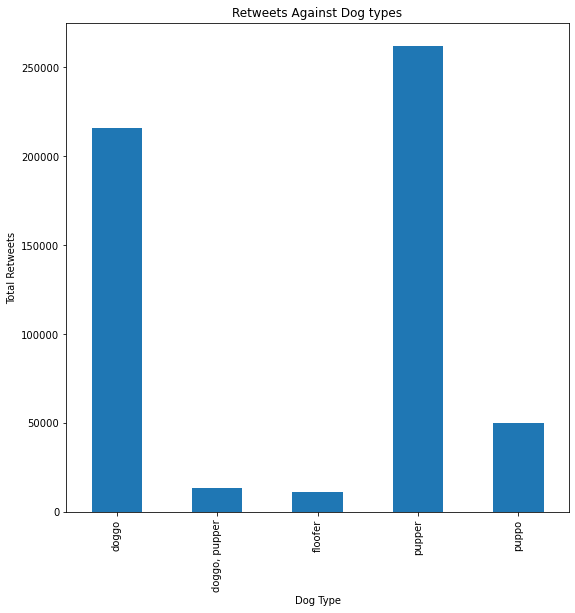

In [94]:
# Plotting
visual.plot(xlabel="Dog Type", ylabel="Total Retweets",kind="bar", figsize=(9, 9), title ="Retweets Against Dog types");

From the graph we can see that pupper had the highest retweets among them all. 